In [1]:
## Import libraries
from dotenv import load_dotenv
import os
import psycopg2
import pandas as pd
import urllib.request
import json
pd.set_option('display.max_columns', 500)

In [2]:
### Environment variable
load_dotenv('.env')
ENDPOINT_FETCH = os.getenv('ENDPOINT_FETCH')
DB_NAME_FETCH = os.getenv('DB_NAME_FETCH')
USERNAME_FETCH = os.getenv('USERNAME_FETCH')
PASSWORD_FETCH = os.getenv('PASSWORD_FETCH')
ENDPOINT = os.getenv('ENDPOINT')
DB_NAME = os.getenv('DB_NAME')
USER = os.getenv('USER')
PASSWORD = os.getenv('PASSWORD')
print(USER)

nathan


In [3]:
## Extract tables from AWS RDS and turn into a dataframe
## create engine - connect to Historiacl wildfire data - Maran db
engine = psycopg2.connect("host={} dbname={} user={} password={}".format(
        ENDPOINT_FETCH, DB_NAME_FETCH, USERNAME_FETCH, PASSWORD_FETCH))
cur = engine.cursor()

## Extract table into a dataframe
#cur.execute("SELECT * FROM Firedata_History;")
df_wildfires = pd.read_sql("SELECT * FROM Firedata_History;", engine)
engine.close()

## create engine - connect to Historiacl weather data - Nathan db
## extract data from historical whether data table
engine = psycopg2.connect("host={} dbname={} user={} password={}".format(
        ENDPOINT, DB_NAME, USER, PASSWORD))
cur = engine.cursor()

## Extract table into a dataframe
#cur.execute("SELECT * FROM Firedata_History;")
df_weather = pd.read_sql("SELECT * FROM HISTORICAL_WEATHER_DATA;", engine)
engine.close()

c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df_wildfires.head()

,objectid,containmentdatetime,controldatetime,dailyacres,discoveryacres,firecause,firecausegeneral,firecausespecific,firediscoverydatetime,firemgmtcomplexity,fireoutdatetime,incidentname,incidenttypecategory,incidenttypekind,initiallatitude,initiallongitude,initialresponseacres,poocity,poocounty,poolandownerkind,poostate,dateofupload
0,139,2016-05-05,2016-05-05,0.1,0.1,Natural,None,None,2016-05-05,None,2016-05-31,Monroe,WF,FI,38.767220,-119.8167,0.1,None,Alpine,None,US-CA,2022-04-21
1,287,2015-07-05,2015-07-10,0.2,0.1,Natural,None,None,2015-07-05,None,2015-07-11,SPRING,WF,FI,41.421398,-122.4981,NaN,None,Siskiyou,Federal,US-CA,2022-04-21
2,510,2019-08-11,2019-08-11,0.1,0.1,Natural,None,None,2019-08-10,None,2019-08-12,HAPPY,WF,FI,41.046330,-122.0796,NaN,None,Shasta,Federal,US-CA,2022-04-21
3,716,2017-08-07,2017-08-20,0.1,0.1,Natural,None,None,2017-08-07,None,2017-08-20,COAL,WF,FI,41.357780,-120.9694,0.1,None,Modoc,Federal,US-CA,2022-04-21
4,901,2017-08-06,2017-08-07,0.1,0.1,Natural,None,None,2017-08-06,None,2017-09-20,GEM,WF,FI,37.751220,-119.1410,0.1,None,Mono,Federal,US-CA,2022-04-21


In [5]:
df_weather.head()

,id,address,name,latitude,longitude,tz,wdir,temp,maxt,visibility,wspd,datetimestr,solarenergy,heatindex,cloudcover,mint,precip,solarradiation,weathertype,snowdepth,sealevelpressure,snow,dew,humidity,precipcover,wgust,conditions,windchill
0,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,176.79,9.4,17.6,15.9,11.9,2016-05-03,NaN,NaN,30.0,0.3,0.00,NaN,Light Rain,62.42,1018.6,0.00,2.0,64.00,0.00,37.1,Partially cloudy,-0.7
1,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,176.08,10.4,17.7,16.0,18.3,2016-05-04,NaN,NaN,23.6,3.4,0.24,NaN,"Lightning Without Thunder, Light Rain",59.08,1013.0,5.87,2.5,62.93,8.33,56.9,Snow,2.7
2,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,148.46,7.2,11.5,14.3,15.7,2016-05-05,NaN,NaN,63.4,2.9,12.80,NaN,"Lightning Without Thunder, Mist, Light Snow, T...",58.15,1009.3,3.78,4.0,80.99,54.17,37.1,"Snow, Partially cloudy",1.9
3,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,220.33,6.6,12.9,13.8,12.2,2016-05-06,NaN,NaN,68.7,2.0,9.14,NaN,"Mist, Light Snow, Rain, Thunderstorm, Light Rain",55.52,1009.5,0.00,2.7,78.93,58.33,31.7,"Rain, Partially cloudy",0.2
4,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,181.25,7.0,9.4,14.8,10.7,2016-05-07,NaN,NaN,81.0,4.9,4.33,NaN,"Mist, Light Rain",63.04,1011.5,10.78,5.1,87.57,45.83,NaN,"Snow, Overcast",4.0


In [15]:
## extracting only wanted columns from wildfires df
df1 = df_wildfires[
    [
        "objectid",
        "firediscoverydatetime",
        "discoveryacres",
        "initiallatitude",
        "initiallongitude",
    ]
]
## extracting only wanted columns from wheather df
df2 = df_weather[
    [
        "latitude",
        "longitude",
        "temp",
        "maxt",
        "datetimestr",
        "precip",
        "dew",
        "humidity",
        "wgust",
        "wdir",
        "wspd",
        "sealevelpressure"

    ]
]


In [16]:
print(df1.shape)
print(df2.shape)


(1464, 5)
(965, 12)


In [17]:
print(df1.head())
print(df2.head())

   objectid firediscoverydatetime  discoveryacres  initiallatitude  \
0       139            2016-05-05             0.1        38.767220   
1       287            2015-07-05             0.1        41.421398   
2       510            2019-08-10             0.1        41.046330   
3       716            2017-08-07             0.1        41.357780   
4       901            2017-08-06             0.1        37.751220   

   initiallongitude  
0         -119.8167  
1         -122.4981  
2         -122.0796  
3         -120.9694  
4         -119.1410  
   latitude  longitude  temp  maxt datetimestr  precip  dew  humidity  wgust  \
0  38.76722  -119.8167   9.4  17.6  2016-05-03    0.00  2.0     64.00   37.1   
1  38.76722  -119.8167  10.4  17.7  2016-05-04    0.24  2.5     62.93   56.9   
2  38.76722  -119.8167   7.2  11.5  2016-05-05   12.80  4.0     80.99   37.1   
3  38.76722  -119.8167   6.6  12.9  2016-05-06    9.14  2.7     78.93   31.7   
4  38.76722  -119.8167   7.0   9.4  2016-05-07 

In [18]:
df1.columns = ["objectid", "datetimestr", "discoveryacres", "latitude", "longitude"]

In [19]:
df_merge = pd.merge(df1, df2, on=["datetimestr", "latitude", "longitude"], how='inner')
df_merge = pd.merge(df1, df2, on=["datetimestr", "latitude", "longitude"], how='right')

df_merge.head()

,objectid,datetimestr,discoveryacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure
0,NaN,2016-05-03,NaN,38.76722,-119.8167,9.4,17.6,0.00,2.0,64.00,37.1,176.79,11.9,1018.6
1,NaN,2016-05-04,NaN,38.76722,-119.8167,10.4,17.7,0.24,2.5,62.93,56.9,176.08,18.3,1013.0
2,139.0,2016-05-05,0.1,38.76722,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3
3,NaN,2016-05-06,NaN,38.76722,-119.8167,6.6,12.9,9.14,2.7,78.93,31.7,220.33,12.2,1009.5
4,NaN,2016-05-07,NaN,38.76722,-119.8167,7.0,9.4,4.33,5.1,87.57,NaN,181.25,10.7,1011.5


In [20]:
#df_merge["temp_plus_1"] =
df_merge["tmp_plus_1"] = df_merge["temp"].shift(-1)
df_merge["tmp_plus_2"] = df_merge["temp"].shift(-2)

df_merge["maxt_plus_1"] = df_merge["maxt"].shift(-1)
df_merge["maxt_plus_2"] = df_merge["maxt"].shift(-2)

df_merge["precip_plus_1"] = df_merge["precip"].shift(-1)
df_merge["precip_plus_2"] = df_merge["precip"].shift(-2)

df_merge["dew_plus_1"] = df_merge["dew"].shift(-1)
df_merge["dew_plus_2"] = df_merge["dew"].shift(-2)

df_merge["humidity_plus_1"] = df_merge["humidity"].shift(-1)
df_merge["humidity_plus_2"] = df_merge["humidity"].shift(-2)

df_merge["wgust_plus_1"] = df_merge["wgust"].shift(-1)
df_merge["wgust_plus_2"] = df_merge["wgust"].shift(-2)

df_merge["wdir_plus_1"] = df_merge["wdir"].shift(-1)
df_merge["wdir_plus_2"] = df_merge["wdir"].shift(-2)

df_merge["wspd_plus_1"] = df_merge["wspd"].shift(-1)
df_merge["wspd_plus_2"] = df_merge["wspd"].shift(-2)

df_merge.head()

,objectid,datetimestr,discoveryacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2
0,NaN,2016-05-03,NaN,38.76722,-119.8167,9.4,17.6,0.00,2.0,64.00,37.1,176.79,11.9,1018.6,10.4,7.2,17.7,11.5,0.24,12.80,2.5,4.0,62.93,80.99,56.9,37.1,176.08,148.46,18.3,15.7
1,NaN,2016-05-04,NaN,38.76722,-119.8167,10.4,17.7,0.24,2.5,62.93,56.9,176.08,18.3,1013.0,7.2,6.6,11.5,12.9,12.80,9.14,4.0,2.7,80.99,78.93,37.1,31.7,148.46,220.33,15.7,12.2
2,139.0,2016-05-05,0.1,38.76722,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7
3,NaN,2016-05-06,NaN,38.76722,-119.8167,6.6,12.9,9.14,2.7,78.93,31.7,220.33,12.2,1009.5,7.0,23.4,9.4,28.2,4.33,0.00,5.1,12.7,87.57,51.78,NaN,NaN,181.25,117.50,10.7,5.6
4,NaN,2016-05-07,NaN,38.76722,-119.8167,7.0,9.4,4.33,5.1,87.57,NaN,181.25,10.7,1011.5,23.4,24.3,28.2,34.7,0.00,0.08,12.7,13.3,51.78,53.99,NaN,NaN,117.50,124.58,5.6,15.6


In [42]:
df = df_merge[df_merge.objectid.notnull()].copy()
df.head()

,objectid,datetimestr,discoveryacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7
7,287.0,2015-07-05,0.1,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5


In [43]:
## setting month as a new feature
df["month"] = df["datetimestr"].apply(lambda x: x.month)
df.head()

,objectid,datetimestr,discoveryacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2,month
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7,5
7,287.0,2015-07-05,0.1,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2,7
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7,8
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3,8
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5,8


In [44]:
statment = df["discoveryacres"]!=df["discoveryacres"].max()
statment
df = df[statment]

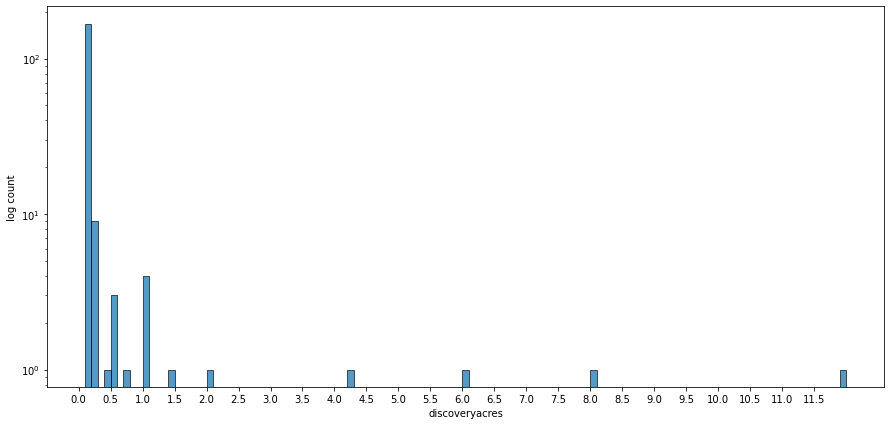

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(1,1, figsize=(15,7)) 
sns.histplot(df.discoveryacres, binwidth=0.1)
ax.set_yscale('log')
ax.set_ylabel('log count')
ax.set_xticks(np.arange(0, 12, 0.5))

plt.show()


In [59]:
bins = [0, 0.2, 0.6, 1.1, np.inf]
names = ['<0.2', '0.2-0.6', '0.6-1.1', '1.1<']

df['FireSize'] = pd.cut(df['discoveryacres'], bins, labels=names)
df.head()

,objectid,datetimestr,discoveryacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2,month,FireSize
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7,5,<0.2
7,287.0,2015-07-05,0.1,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2,7,<0.2
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7,8,<0.2
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3,8,<0.2
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5,8,<0.2


In [ ]:
# import pandas_profiling as prof
# from pathlib import Path
# ## Initial phase report EDA
# profile = prof.ProfileReport(df, title="Profile Report wildfires ML", explorative=True)
# profile.to_file(Path("First_profile_report_wildfires.html"))

c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]
